In [28]:
import pandas as pd
import numpy as np

In [29]:
frm_knn = []
frm_svc = []
frm_dt = []
frm_rf = []
frm_mlp = []
frm_gb = []

# DATASET-1 --------------------------------------------

# Data Manipulation

In [30]:
df = pd.read_csv('online_shoppers_intention.csv')

### Reading the Data

In [31]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [32]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [34]:
for i in df.columns:
    k=df[i].nunique()
    print(f'{i} : {k}')

Administrative : 27
Administrative_Duration : 3335
Informational : 17
Informational_Duration : 1258
ProductRelated : 311
ProductRelated_Duration : 9551
BounceRates : 1872
ExitRates : 4777
PageValues : 2704
SpecialDay : 6
Month : 10
OperatingSystems : 8
Browser : 13
Region : 9
TrafficType : 20
VisitorType : 3
Weekend : 2
Revenue : 2


In [35]:
Y=df['Revenue']
X=df.drop('Revenue',axis=1)

## Data preprocesing

Splitting the Numercal and categorical data for standardization and 1-hot encoding 

In [36]:
X_numerical = X.drop(['Month','VisitorType'],axis=1)

In [37]:
X_numerical.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend'],
      dtype='object')

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_numerical)
X_num_scaled.shape #zero mean unit variance standardization

(12330, 15)

In [39]:
X_num_sc=pd.DataFrame(X_num_scaled,columns=list(X_numerical.columns))

In [40]:
X_num_sc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.142857,0.083333,0.000,0.052632,0.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.428571,0.000000,1.000,0.105263,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.285714,0.083333,0.125,0.157895,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.285714,0.166667,0.000,0.157895,1.0


In [41]:
X_scaled = pd.concat([X_num_sc,X[['Month','VisitorType']]],axis=1)

In [42]:
X_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month,VisitorType
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0,Feb,Returning_Visitor
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.142857,0.083333,0.000,0.052632,0.0,Feb,Returning_Visitor
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.428571,0.000000,1.000,0.105263,0.0,Feb,Returning_Visitor
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.285714,0.083333,0.125,0.157895,0.0,Feb,Returning_Visitor
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.285714,0.166667,0.000,0.157895,1.0,Feb,Returning_Visitor


In [43]:
X_scaled_enc=X_scaled #made another variable just to preserve the above one
for i in ['VisitorType']:
    dummies = pd.get_dummies(X_scaled[i]) #1-hot encoding
    dummies.columns=str(i)+'_'+dummies.columns 
    X_scaled_enc = pd.concat([X_scaled_enc,dummies],axis=1)
    X_scaled_enc.drop(i,inplace=True,axis=1)
    


In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le_month = LabelEncoder()
X_scaled_enc['Month'] = le_month.fit_transform(X_scaled_enc['Month'])

In [46]:
X_scaled_enc.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0,2,0,0,1
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.142857,0.083333,0.000,0.052632,0.0,2,0,0,1
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.428571,0.000000,1.000,0.105263,0.0,2,0,0,1
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.285714,0.083333,0.125,0.157895,0.0,2,0,0,1
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.285714,0.166667,0.000,0.157895,1.0,2,0,0,1


In [47]:
from sklearn.model_selection import train_test_split
# ls=list(range(2,110,10))
# X_train, X_test, y_train,y_test = train_test_split(X_scaled_enc,Y,test_size=0.3,random_state=i)
X_train = X_scaled_enc
y_train = Y


In [77]:
#splitting the data
# X_train, X_test, y_train,y_test = train_test_split(X_scaled_enc,Y,test_size=0.3,random_state=32)
# X_train.shape,X_test.shape

### Checking correlation for feature selection

In [49]:
X_train.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [50]:
X_corr = X_train[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend']]

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

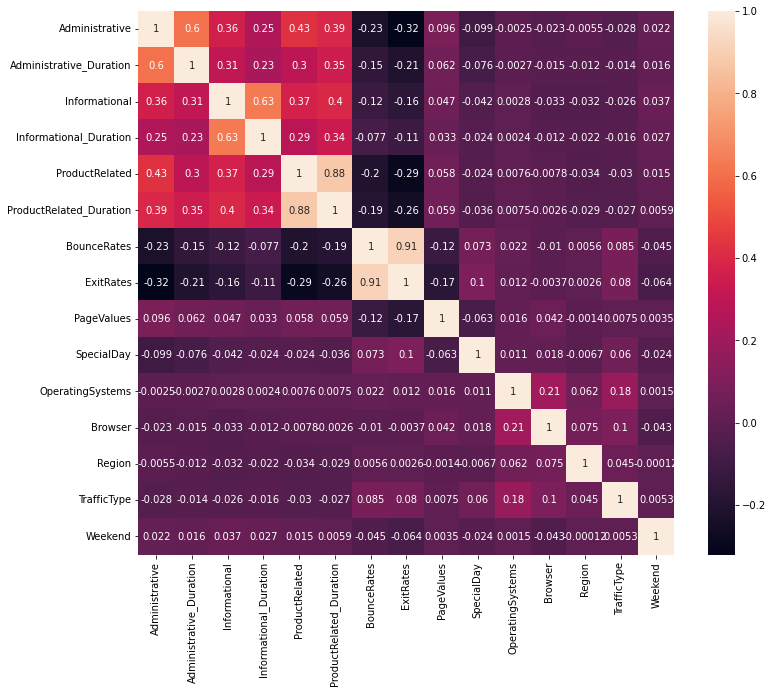

In [52]:
plt.figure(figsize=(12,10))
cor=X_corr.corr()
sns.heatmap(cor, annot=True)
plt.show()

### Feature Selection

In [53]:
#function to find columns correlated and to be removed
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [54]:
corr_feat = correlation(X_corr,0.85)
corr_feat

{'ExitRates', 'ProductRelated_Duration'}

In [55]:
corr_feat = list(corr_feat)
X_train.drop(corr_feat,inplace=True,axis=1)

/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
X_train.shape

(8631, 17)

In [57]:
y_train.shape

(8631,)

## Mutual Induction to find the best features

In [58]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
# mutual_info = mutual_info_classif(X_train, y_train)
# mutual_info 

In [59]:
# mutual_info = pd.Series(mutual_info)
# mutual_info.index = X_train.columns
# mutual_info.sort_values(ascending=False)

In [60]:
from sklearn.feature_selection import SelectKBest
sel_cols = SelectKBest(mutual_info_classif, k=14)
sel_cols.fit(X_train, y_train)
topk = list(X_train.columns[sel_cols.get_support()])
topk

['Administrative',
 'Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'BounceRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Region',
 'TrafficType',
 'Weekend',
 'Month',
 'VisitorType_Other',
 'VisitorType_Returning_Visitor']

In [61]:
X_train =X_train[topk]
# X_test = X_test[topk]

## Oversampling

In [62]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state =42)
X_train, y_train = smt.fit_resample(X_train,y_train)

In [63]:
##importing griddesarch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## KNN-Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
grid_params = {
    'n_neighbors' : [3,5,11,15,19],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=grid_params,n_jobs=-1,verbose=2,cv=10)
knn_grid.fit(X_train,y_train)
knn_best_para = knn_grid.best_params_
print(knn_best_para)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [65]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer, f1_score
# K_fold_knn = cross_val_score(knn,X_train, y_train,scoring = make_scorer(f1_score, average='weighted'), cv=10)
knn = KNeighborsClassifier(**knn_best_para)
K_fold_knn = cross_val_score(knn,X_train, y_train, cv=10)
frm_knn.append(K_fold_knn.mean())
K_fold_knn.mean()

0.9204514363885089

## SVM-Classifier

In [66]:
from sklearn.svm import SVC

In [67]:
SVMmodel = SVC()
# from sklearn.model_selection import cross_val_score
K_fold_svm = cross_val_score(SVMmodel,X_train, y_train, cv=10)

frm_svc.append(K_fold_svm.mean())
K_fold_svm.mean()


0.7462380300957592

## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=tree_para,n_jobs=-1,verbose=2,cv=10)
dt_grid.fit(X_train,y_train)
dt_best_para = dt_grid.best_params_
print(dt_best_para)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'criterion': 'entropy', 'max_depth': 30}


In [70]:
dtree = DecisionTreeClassifier(**dt_best_para)
# from sklearn.model_selection import cross_val_score
K_fold_dtree = cross_val_score(dtree,X_train, y_train, cv=10)
frm_dt.append(K_fold_dtree.mean())
K_fold_dtree.mean()


0.9095075239398087

## Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    
}
rf_grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,n_jobs=-1,verbose=2,cv=10)
rf_grid.fit(X_train,y_train)
rf_best_para = rf_grid.best_params_
print(rf_best_para)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}


In [73]:
rfc = RandomForestClassifier(n_estimators=100)
K_fold_rfc = cross_val_score(rfc,X_train, y_train, cv=10)
frm_rf.append(K_fold_rfc.mean())
K_fold_rfc.mean()


0.9348153214774282

## MLP

In [74]:
from sklearn.neural_network import MLPClassifier
parameters={ 'learning_rate': ["constant", "invscaling", "adaptive"], 'hidden_layer_sizes': [(100,1), (100,2), (100,3)], 'alpha': [0.01,0.1,0.2,0.02], 'activation': ["logistic", "relu", "Tanh"]}

mlp_grid = GridSearchCV(estimator=MLPClassifier(),param_grid=parameters,n_jobs=-1,verbose=2,cv=2)

mlp_grid.fit(X_train,y_train)

mlp_best_para = mlp_grid.best_params_

print(mlp_best_para)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.5        0.6749658  0.67886457 0.67954856 0.85499316 0.85937073
 0.85725034 0.85649795 0.85088919 0.66689466 0.65554036 0.50396717
 0.84035568 0.83071135 0.83652531 0.83180575 0.8370725  0.83290014
 0.5        0.65157319 0.5        0.66094391 0.69288646 0.82236662
 0.8245554  0.81395349 0.82934337 0.85465116 0.8501368  0.85218878
 0.849658   0.849658   0.67017784 0.84822161 0.84781122 0.85259918
 0.87824897 0.69186047 0.68433653 0.87831737 0.88077975 0.87606019
 0.88214774 0.87818057 0.88132695 0.68221614 0.87017784 0.87113543
 0.86798906 0.68597811 0.86354309 0.87250342 0.87250342 0.86839945
 0.8621751  0.5        0.86675787 0.86792066 0.86149111 0.86183311
 0.86607387 0.86388509 0.86415869 0.69097127 0.87346101 0.6872777
 0.87927497 0.87763338 0.6873461  0.87571819 0.87879617 0.87393981
        nan        nan    

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 3), 'learning_rate': 'constant'}


/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [75]:
mlp = MLPClassifier(**mlp_best_para)
K_fold_mlp = cross_val_score(mlp,X_train, y_train, cv=10)
frm_mlp.append(K_fold_mlp.mean())
K_fold_mlp.mean()

/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochasti

0.8835841313269495

## Gradient Booster

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
parameters = {#'nthread':[3,4], #when use hyperthread, xgboost may become slower
               "criterion": ["friedman_mse",  "mae"],
              "loss":["deviance","exponential"],
#               "max_features":["log2","sqrt"],
#               'learning_rate': [0.2,0.08,0.1], #so called `eta` value
#               'max_depth': [3,4,5],
#               'min_samples_leaf': [4,5,6],
# 
#               'subsample': [0.6,0.7,0.8],
              'n_estimators': [5,10,20],#number of trees, change it to 1000 for better results

              }
gb_grid = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=parameters,n_jobs=-1,verbose=2,cv=10)
gb_grid.fit(X_train,y_train)
gb_best_para = gb_grid.best_params_
# frm_gb.append(gb_grid.mean())

print(gb_best_para)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/ensemble/_gb.py:1122: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  "Boosting.", FutureWarning)


AttributeError: 'GridSearchCV' object has no attribute 'mean'

In [83]:
print(gb_best_para)

{'criterion': 'mae', 'loss': 'exponential', 'n_estimators': 20}


In [ ]:
print("hello")

In [84]:
gb = GradientBoostingClassifier(**gb_best_para)
K_fold_gb = cross_val_score(gb,X_train, y_train, cv=10)
frm_gb.append(K_fold_gb.mean())
K_fold_gb.mean()

/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/ensemble/_gb.py:1122: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  "Boosting.", FutureWarning)
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/ensemble/_gb.py:1122: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  "Boosting.", FutureWarning)
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/ensemble/_gb.py:1122: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees sh

0.8926128590971271

# Paired t-test

In [85]:
from scipy import stats

In [86]:
d1model = [K_fold_knn,K_fold_svm,K_fold_dtree,K_fold_rfc,K_fold_mlp,K_fold_gb]
d1modelNames = ["KNN","SVM","DTREE","RFC","MLP","GB"]

In [87]:
ttest = pd.DataFrame(np.transpose(d1model),columns=d1modelNames)
ttest

,KNN,SVM,DTREE,RFC,MLP,GB
0,0.903557,0.733926,0.783174,0.851573,0.841313,0.836525
1,0.912449,0.735978,0.820793,0.875513,0.855677,0.861149
2,0.924077,0.744186,0.932285,0.954856,0.898769,0.906977
3,0.919973,0.743502,0.935705,0.954856,0.901505,0.904925
4,0.921341,0.731190,0.937073,0.954856,0.885089,0.902873
5,0.903557,0.747606,0.937756,0.954856,0.893981,0.905609
6,0.920657,0.734610,0.943228,0.950752,0.882353,0.902873
7,0.928181,0.762654,0.930233,0.946648,0.877565,0.888509
8,0.937073,0.758550,0.943912,0.953488,0.908345,0.908345
9,0.933653,0.770178,0.930917,0.950752,0.891245,0.908345


In [89]:
alpha =0.05
for i in range(5):
    for j in range(i+1,6):
        stat, p = stats.ttest_rel(d1model[i], d1model[j])
        if p>alpha:
            print(f'there is statical difference between {d1modelNames[i]} and {d1modelNames[j]}')
        else:
            print(f'there is no statical difference between {d1modelNames[i]} and {d1modelNames[j]}')

        

there is no statical difference between KNN and SVM
there is statical difference between KNN and DTREE
there is statical difference between KNN and RFC
there is no statical difference between KNN and MLP
there is no statical difference between KNN and GB
there is no statical difference between SVM and DTREE
there is no statical difference between SVM and RFC
there is no statical difference between SVM and MLP
there is no statical difference between SVM and GB
there is no statical difference between DTREE and RFC
there is statical difference between DTREE and MLP
there is statical difference between DTREE and GB
there is no statical difference between RFC and MLP
there is no statical difference between RFC and GB
there is no statical difference between MLP and GB


# DATASET 2---------------------------------------------

In [90]:
import pandas as pd
import numpy as np

# Data Manipulation

In [91]:
df = pd.read_csv('marketing_campaign.csv')

### Reading the Data

In [92]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [93]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [95]:
for i in df.columns:
    k=df[i].nunique()
    n = df[i].isna().sum()
    print(f'{i} : {k} , {n}')

ID : 2240 , 0
Year_Birth : 59 , 0
Education : 5 , 0
Marital_Status : 8 , 0
Income : 1974 , 24
Kidhome : 3 , 0
Teenhome : 3 , 0
Dt_Customer : 663 , 0
Recency : 100 , 0
MntWines : 776 , 0
MntFruits : 158 , 0
MntMeatProducts : 558 , 0
MntFishProducts : 182 , 0
MntSweetProducts : 177 , 0
MntGoldProds : 213 , 0
NumDealsPurchases : 15 , 0
NumWebPurchases : 15 , 0
NumCatalogPurchases : 14 , 0
NumStorePurchases : 14 , 0
NumWebVisitsMonth : 16 , 0
AcceptedCmp3 : 2 , 0
AcceptedCmp4 : 2 , 0
AcceptedCmp5 : 2 , 0
AcceptedCmp1 : 2 , 0
AcceptedCmp2 : 2 , 0
Complain : 2 , 0
Z_CostContact : 1 , 0
Z_Revenue : 1 , 0
Response : 2 , 0


In [96]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'] = df['Dt_Customer'].astype('int64')

In [97]:
avgInc = df['Income'].mean()
df['Income'].fillna(avgInc, inplace=True)

In [98]:
df['Teenhome'] = df['Teenhome'].map(lambda x : True if (x >= 1) else False)

In [99]:
from collections import Counter
Counter(df['Teenhome'])

Counter({False: 1158, True: 1082})

## Data preprocesing

In [100]:
X= df.drop(['Teenhome'], axis=1)
y= df['Teenhome']

##A#dding series encoding for education and delting ID

In [101]:
X['Education'] = X['Education'].map(lambda x: 1 if x=='Basic' else (2 if x=="Graduation" else (3 if x=="2n Cycle" else( 4 if x=="Master" else 5)) ) )

In [102]:
X['Education'].unique()

array([2, 5, 4, 1, 3])

In [103]:
X.drop(['ID'], axis=1, inplace=True)

Splitting the Numercal and categorical data for standardization and 1-hot encoding 

In [104]:
X_numerical = X.drop(['Marital_Status'],axis=1)

In [105]:
X_numerical.columns

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_numerical)
X_num_scaled.shape #zero mean unit variance standardization

(2240, 26)

In [107]:
X_num_sc=pd.DataFrame(X_num_scaled,columns=list(X_numerical.columns))

In [108]:
X_num_sc.head()

,Year_Birth,Education,Income,Kidhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0.621359,0.25,0.084832,0.0,0.086548,0.585859,0.425318,0.442211,0.316522,0.664093,...,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.592233,0.25,0.067095,0.5,0.882408,0.383838,0.007368,0.005025,0.003478,0.007722,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.699029,0.25,0.105097,0.0,0.555974,0.262626,0.285332,0.246231,0.073623,0.428571,...,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.883495,0.25,0.037471,0.5,0.938852,0.262626,0.007368,0.020101,0.011594,0.038610,...,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.854369,1.00,0.085065,0.5,0.698024,0.949495,0.115874,0.216080,0.068406,0.177606,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
X_scaled = pd.concat([X_num_sc,X[['Marital_Status']]],axis=1)

In [110]:
X_scaled.shape

(2240, 27)

In [111]:
n=0
for i in X_scaled['Marital_Status']:
    if i in ['Single','Divorced', 'Widow', 'Alone','Absurd', 'YOLO']:
        X_scaled['Marital_Status'][n]=0
    else:
        X_scaled['Marital_Status'][n]=1
    n=n+1
print(n)
        

2240


/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
X_scaled['Marital_Status'] = X_scaled['Marital_Status'].astype(int)

In [113]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   float64
 1   Education            2240 non-null   float64
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   float64
 4   Dt_Customer          2240 non-null   float64
 5   Recency              2240 non-null   float64
 6   MntWines             2240 non-null   float64
 7   MntFruits            2240 non-null   float64
 8   MntMeatProducts      2240 non-null   float64
 9   MntFishProducts      2240 non-null   float64
 10  MntSweetProducts     2240 non-null   float64
 11  MntGoldProds         2240 non-null   float64
 12  NumDealsPurchases    2240 non-null   float64
 13  NumWebPurchases      2240 non-null   float64
 14  NumCatalogPurchases  2240 non-null   float64
 15  NumStorePurchases    2240 non-null   f

In [114]:
# X_scaled_enc=X_scaled #made another variable just to preserve the above one
# for i in ['Marital_Status']:
#     dummies = pd.get_dummies(X_scaled[i]) #1-hot encoding
#     dummies.columns=str(i)+'_'+dummies.columns 
#     X_scaled_enc = pd.concat([X_scaled_enc,dummies],axis=1)
#     X_scaled_enc.drop(i,inplace=True,axis=1)
    


### Checking correlation for feature selection

In [115]:

X_train =X_scaled
y_train =y

In [116]:
X_train.shape

(2240, 27)

In [117]:
X_corr = X_train

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

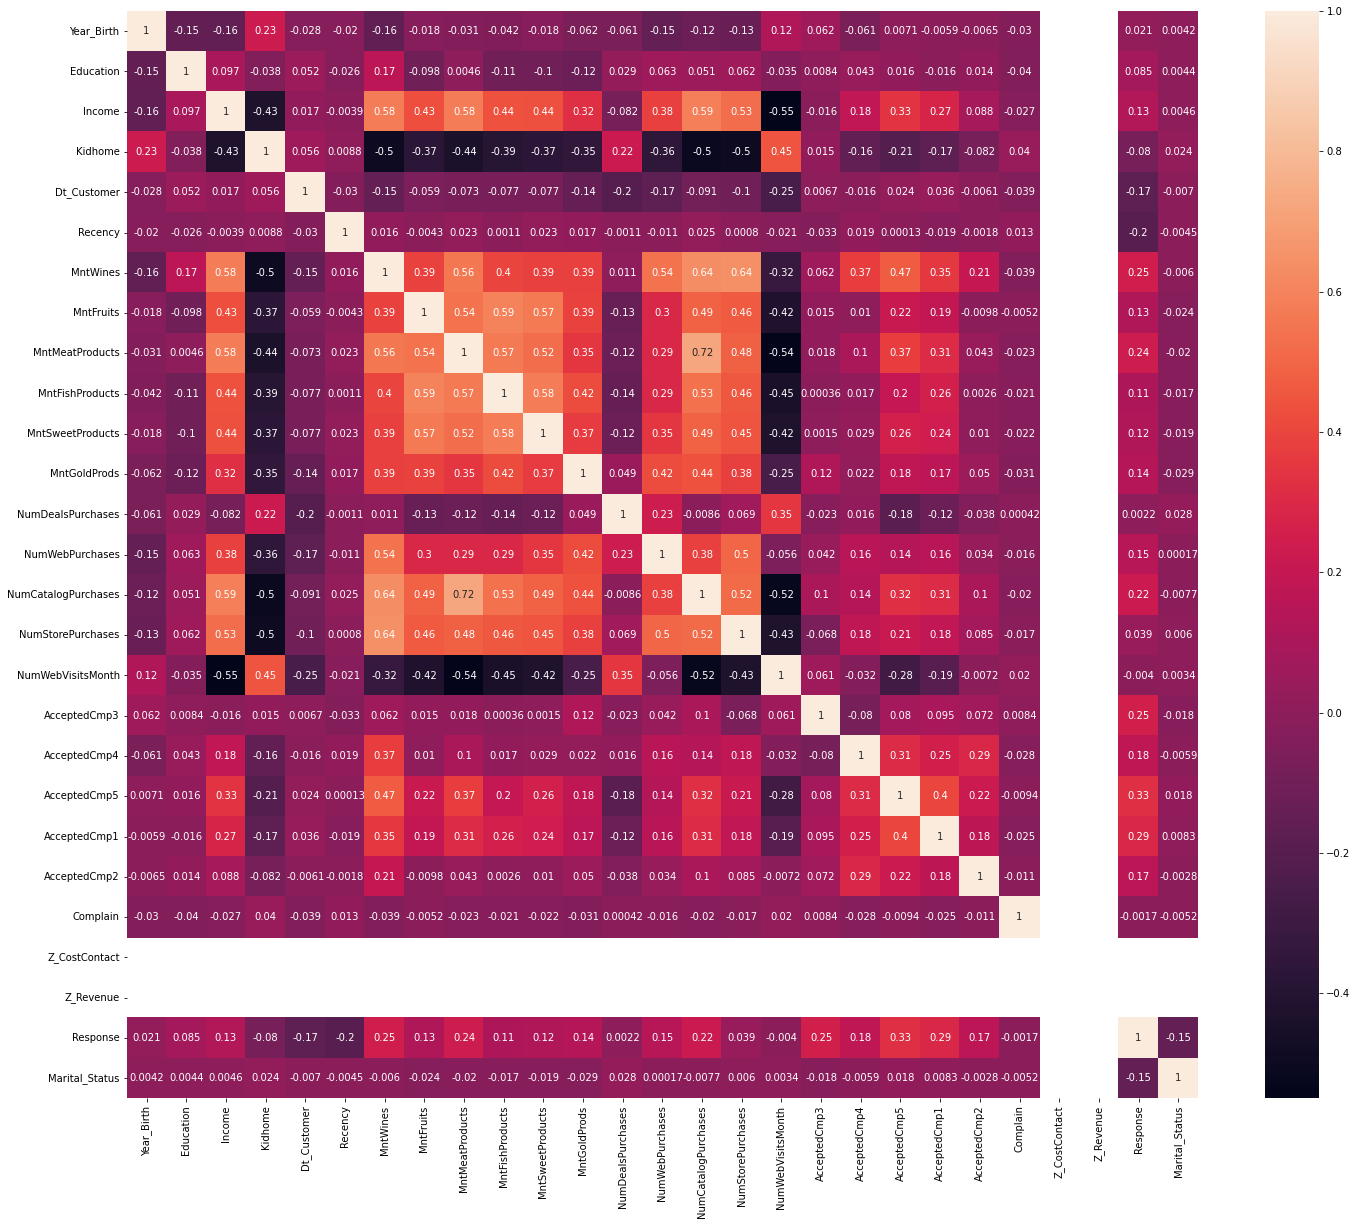

In [119]:
plt.figure(figsize=(24,20))
cor=X_corr.corr()
sns.heatmap(cor, annot=True)
plt.show()

### Feature Selection

## chi2 to find the best features

In [120]:
from sklearn.feature_selection import mutual_info_classif
# # determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info 

array([0.14756005, 0.        , 0.17284697, 0.00211349, 0.01377236,
       0.01023947, 0.07668707, 0.03239888, 0.09704615, 0.04924712,
       0.02647718, 0.02174017, 0.11378569, 0.01204661, 0.042591  ,
       0.00772445, 0.07509547, 0.        , 0.        , 0.02066935,
       0.00656211, 0.00458102, 0.00202943, 0.00414226, 0.01439942,
       0.00343863, 0.        ])

In [121]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Income                 0.172847
Year_Birth             0.147560
NumDealsPurchases      0.113786
MntMeatProducts        0.097046
MntWines               0.076687
NumWebVisitsMonth      0.075095
MntFishProducts        0.049247
NumCatalogPurchases    0.042591
MntFruits              0.032399
MntSweetProducts       0.026477
MntGoldProds           0.021740
AcceptedCmp5           0.020669
Z_Revenue              0.014399
Dt_Customer            0.013772
NumWebPurchases        0.012047
Recency                0.010239
NumStorePurchases      0.007724
AcceptedCmp1           0.006562
AcceptedCmp2           0.004581
Z_CostContact          0.004142
Response               0.003439
Kidhome                0.002113
Complain               0.002029
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
Education              0.000000
Marital_Status         0.000000
dtype: float64

In [122]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
sel_cols = SelectKBest(chi2, k=18)
sel_cols.fit(X_train, y_train)
topk = list(X_train.columns[sel_cols.get_support()])
topk

['Year_Birth',
 'Education',
 'Kidhome',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Marital_Status']

In [123]:
X_train =X_train[topk]
# X_test = X_test[topk]

In [124]:
##importing griddesarch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


## KNN-Classifier

In [125]:
from sklearn.neighbors import KNeighborsClassifier
grid_params = {
    'n_neighbors' : [19,22,30,33,40],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=grid_params,n_jobs=-1,verbose=2,cv=10)
knn_grid.fit(X_train,y_train)
knn_best_para = knn_grid.best_params_
print(knn_best_para)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'metric': 'manhattan', 'n_neighbors': 33, 'weights': 'distance'}


In [126]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer, f1_score
# K_fold_knn = cross_val_score(knn,X_train, y_train,scoring = make_scorer(f1_score, average='weighted'), cv=10)
knn = KNeighborsClassifier(**knn_best_para)
K_fold_knn = cross_val_score(knn,X_train, y_train, cv=10)
frm_knn.append(K_fold_knn.mean())
K_fold_knn.mean()

0.8419642857142857

## SVM-Classifier

In [127]:
from sklearn.svm import SVC

In [128]:
SVMmodel = SVC()
# from sklearn.model_selection import cross_val_score
K_fold_svm = cross_val_score(SVMmodel,X_train, y_train, cv=10)
frm_svc.append(K_fold_svm.mean())
K_fold_svm.mean()


0.83125

## Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,6,8,10,11,15,30,50,70,150]}
dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=tree_para,n_jobs=-1,verbose=2,cv=10)
dt_grid.fit(X_train,y_train)
dt_best_para = dt_grid.best_params_
print(dt_best_para)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'criterion': 'entropy', 'max_depth': 70}


In [131]:
dtree = DecisionTreeClassifier(**dt_best_para)
# from sklearn.model_selection import cross_val_score
K_fold_dtree = cross_val_score(dtree,X_train, y_train, cv=10)
frm_dt.append(K_fold_dtree.mean())
K_fold_dtree.mean()


0.8549107142857142

## Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    
}
rf_grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,n_jobs=-1,verbose=2,cv=10)
rf_grid.fit(X_train,y_train)
rf_best_para = rf_grid.best_params_
print(rf_best_para)

# rfc = RandomForestClassifier(n_estimators=100)
# from sklearn.model_selection import cross_val_score
# K_fold_rfc = cross_val_score(rfc,X_train, y_train, cv=10)
# K_fold_rfc.mean()


Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}


In [134]:
rfc = RandomForestClassifier(n_estimators=100)
K_fold_rfc = cross_val_score(rfc,X_train, y_train, cv=10)
frm_rf.append(K_fold_rfc.mean())
K_fold_rfc.mean()


0.8857142857142858

## MLP

In [135]:
from sklearn.neural_network import MLPClassifier
parameters={ 'learning_rate': ["constant", "invscaling", "adaptive"], 'hidden_layer_sizes': [(100,1), (100,2), (100,3)], 'alpha': [0.01,0.1,0.2,0.02], 'activation': ["logistic", "relu", "Tanh"]}

mlp_grid = GridSearchCV(estimator=MLPClassifier(),param_grid=parameters,n_jobs=-1,verbose=2,cv=2)

mlp_grid.fit(X_train,y_train)

mlp_best_para = mlp_grid.best_params_

print(mlp_best_para)


Fitting 2 folds for each of 108 candidates, totalling 216 fits


/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.77589286 0.5        0.64776786 0.78080357 0.78080357 0.63348214
 0.78303571 0.78482143 0.78258929 0.51696429 0.62589286 0.775
 0.64196429 0.64732143 0.51696429 0.79107143 0.78258929 0.51696429
 0.51696429 0.51741071 0.5        0.646875   0.51696429 0.51696429
 0.77589286 0.77232143 0.775      0.51696429 0.62991071 0.64910714
 0.64508929 0.64910714 0.65178571 0.64866071 0.66294643 0.65401786
 0.5        0.48303571 0.84330357 0.84330357 0.84732143 0.65446429
 0.85133929 0.84776786 0.84419643 0.83258929 0.68973214 0.65446429
 0.846875   0.82410714 0.83616071 0.84732143 0.82723214 0.84017857
 0.66651786 0.64598214 0.65       0.84866071 0.84017857 0.68794643
 0.84464286 0.84285714 0.66919643 0.66964286 0.83392857 0.82767857
 0.69151786 0.85133929 0.84151786 0.84285714 0.83883929 0.84330357
        nan        nan        

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 3), 'learning_rate': 'constant'}


/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [136]:
mlp = MLPClassifier(**mlp_best_para)
K_fold_mlp = cross_val_score(mlp,X_train, y_train, cv=10)
frm_mlp.append(K_fold_mlp.mean())
K_fold_mlp.mean()

/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochasti

0.8580357142857142

## Gradient Booster

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
parameters = {#'nthread':[3,4], #when use hyperthread, xgboost may become slower
               "criterion": ["friedman_mse",  "mae"],
              "loss":["deviance","exponential"],
#               "max_features":["log2","sqrt"],
#               'learning_rate': [0.01,0.05,0.1], #so called `eta` value
#               'max_depth': [3,4,5],
#               'min_samples_leaf': [4,5,6],

              'subsample': [0.6,0.7,0.8],
#               'n_estimators': [5,10,20],#number of trees, change it to 1000 for better results

              }
gb_grid = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=parameters,n_jobs=-1,verbose=2,cv=10)
gb_grid.fit(X_train,y_train)
gb_best_para = gb_grid.best_params_
print(gb_best_para)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
{'criterion': 'friedman_mse', 'loss': 'deviance', 'subsample': 0.8}


In [138]:
gb = GradientBoostingClassifier(**gb_best_para)
K_fold_gb = cross_val_score(gb,X_train, y_train, cv=10)
frm_gb.append(K_fold_gb.mean())
K_fold_gb.mean()

0.878125

# DATASET 3 -----------------------------------

In [139]:
df3 = pd.read_csv('heart.csv')

In [140]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [141]:
X=df3.drop(['target'],axis=1)
y=df3['target']

In [142]:
y.unique()

array([1, 0])

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X)
X_num_scaled.shape #zero mean unit variance standardization

(303, 13)

In [144]:
X_num_sc=pd.DataFrame(X_num_scaled,columns=list(X.columns))

In [145]:
X_num_sc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [146]:
X_train = X_num_sc
y_train =y

## KNN-Classifier

In [147]:
from sklearn.neighbors import KNeighborsClassifier
grid_params = {
    'n_neighbors' : [19,22,30,33,40],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=grid_params,n_jobs=-1,verbose=2,cv=10)
knn_grid.fit(X_train,y_train)
knn_best_para = knn_grid.best_params_
print(knn_best_para)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


In [148]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer, f1_score
# K_fold_knn = cross_val_score(knn,X_train, y_train,scoring = make_scorer(f1_score, average='weighted'), cv=10)
knn = KNeighborsClassifier(**knn_best_para)
K_fold_knn = cross_val_score(knn,X_train, y_train, cv=10)
frm_knn.append(K_fold_knn.mean())
K_fold_knn.mean()

0.8382795698924731

## SVM-Classifier

In [149]:
from sklearn.svm import SVC

In [150]:
SVMmodel = SVC()
# from sklearn.model_selection import cross_val_score
K_fold_svm = cross_val_score(SVMmodel,X_train, y_train, cv=10)
frm_svc.append(K_fold_svm.mean())
K_fold_svm.mean()


0.8118279569892474

## Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,8,12,20,30,50,90,150]}
dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=tree_para,n_jobs=-1,verbose=2,cv=10)
dt_grid.fit(X_train,y_train)
dt_best_para = dt_grid.best_params_
print(dt_best_para)


Fitting 10 folds for each of 16 candidates, totalling 160 fits
{'criterion': 'entropy', 'max_depth': 8}


In [154]:
dtree = DecisionTreeClassifier(**dt_best_para)
# from sklearn.model_selection import cross_val_score
K_fold_dtree = cross_val_score(dtree,X_train, y_train, cv=10)
frm_dt.append(K_fold_dtree.mean())
K_fold_dtree.mean()


0.7719354838709677

## Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    
}
rf_grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,n_jobs=-1,verbose=2,cv=10)
rf_grid.fit(X_train,y_train)
rf_best_para = rf_grid.best_params_
print(rf_best_para)

# rfc = RandomForestClassifier(n_estimators=100)
# from sklearn.model_selection import cross_val_score
# K_fold_rfc = cross_val_score(rfc,X_train, y_train, cv=10)
# K_fold_rfc.mean()


Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}


In [157]:
rfc = RandomForestClassifier(n_estimators=100)
K_fold_rfc = cross_val_score(rfc,X_train, y_train, cv=10)
frm_rf.append(K_fold_rfc.mean())
K_fold_rfc.mean()


0.8149462365591399

## MLP

In [158]:
from sklearn.neural_network import MLPClassifier
parameters={ 'learning_rate': ["constant", "invscaling", "adaptive"], 'hidden_layer_sizes': [(100,1), (100,2), (100,3)], 'alpha': [0.01,0.1,0.2,0.02], 'activation': ["logistic", "relu", "Tanh"]}

mlp_grid = GridSearchCV(estimator=MLPClassifier(),param_grid=parameters,n_jobs=-1,verbose=2,cv=2)

mlp_grid.fit(X_train,y_train)

mlp_best_para = mlp_grid.best_params_
print(mlp_best_para)


Fitting 2 folds for each of 108 candidates, totalling 216 fits


/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.50150314 0.64323371 0.49849686 0.67612844 0.62763594 0.67368857
 0.81186825 0.67037731 0.50150314 0.49849686 0.49849686 0.65310213
 0.64388724 0.65713228 0.54454949 0.62979261 0.67368857 0.54454949
 0.50150314 0.45545051 0.54454949 0.67283897 0.63637156 0.54454949
 0.67941792 0.67612844 0.63308208 0.6471985  0.50150314 0.45545051
 0.66375479 0.50150314 0.65050976 0.63308208 0.6835352  0.79204427
 0.78873301 0.63308208 0.50150314 0.49849686 0.81178111 0.81186825
 0.83167044 0.85798623 0.64419223 0.83491635 0.54454949 0.69257581
 0.81520129 0.80526751 0.80531108 0.82511328 0.82182381 0.68031108
 0.68270739 0.45545051 0.63637156 0.81184646 0.84160422 0.81846898
 0.82175845 0.82498257 0.78882015 0.80860056 0.67941792 0.69257581
 0.82504793 0.69024486 0.81186825 0.82175845 0.69024486 0.83829296
        nan        nan   

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 3), 'learning_rate': 'invscaling'}


/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [159]:
mlp = MLPClassifier(**mlp_best_para)
K_fold_mlp = cross_val_score(mlp,X_train, y_train, cv=10)
frm_mlp.append(K_fold_mlp.mean())
K_fold_mlp.mean()

/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochasti

0.8413978494623656

## Gradient Booster

In [160]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
parameters = {#'nthread':[3,4], #when use hyperthread, xgboost may become slower
               "criterion": ["friedman_mse",  "mae"],
              "loss":["deviance","exponential"],
#               "max_features":["log2","sqrt"],
#               'learning_rate': [0.01,0.05,0.1], #so called `eta` value
#               'max_depth': [3,4,5],
#               'min_samples_leaf': [4,5,6],

              'subsample': [0.6,0.7,0.8],
              'n_estimators': [5,10,20]#number of trees, change it to 1000 for better results

              }
gb_grid = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=parameters,n_jobs=-1,verbose=2,cv=10)
gb_grid.fit(X_train,y_train)
gb_best_para = gb_grid.best_params_
print(gb_best_para)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'criterion': 'friedman_mse', 'loss': 'exponential', 'n_estimators': 10, 'subsample': 0.6}


In [161]:
gb = GradientBoostingClassifier(**gb_best_para)
K_fold_gb = cross_val_score(gb,X_train, y_train, cv=10)
frm_gb.append(K_fold_gb.mean())
K_fold_gb.mean()

0.8080645161290324

In [ ]:
print(frm_knn,
frm_svc,
frm_dt, 
frm_rf, 
frm_mlp, 
frm_gb)

# Friedman Test

In [ ]:
ftest =  pd.Datafram